# Employee Satisfaction Themes
## Technical Notebook
<img src="../images/job_grayscale.jpg" align="" width="600" height="600" />

 
## Project Goals
- Attempt to discover common themes of employee satisfaction and dissatisfaction among Fortune 100 companies using reviews from glassdoor.com
- Determine which companies particularly excel or fail in these categories
- Attempt to discover common principles that companies advocate for in their mission and vision statements, using manually scraped mission and vision statements from company pages
- Determine the amount of "mismatch" between employee and company sentiment, evaluating difference between employee-provided reviews and company mission and vision statements

## Summary of Data
The employee review data consists of 250,000+ employee-provided reviews of companies. This data was web-scraped from glassdoor.com, and contains information only from Fortune 100 companies. Each review consists of a "Pros" and "Cons" section.

### Library and Function Import

In [156]:
#Import libraries
%run ../python_files/libraries
# need to import libraries that functions are dependent on separately within functions.py file
%run ../python_files/functions
%matplotlib inline
# from libraries import *   #for use within .py file

### Object Import

In [126]:
# 'unpickle' saved objects
with open('../../saved_objects/tokenized_pros.pkl', 'rb') as f:
    tokenized_pros = pickle.load(f)
with open('../../saved_objects/tokenized_cons.pkl', 'rb') as f:
    tokenized_cons = pickle.load(f)
with open('../../saved_objects/stemmed_pros.pkl', 'rb') as f:
    stemmed_pros = pickle.load(f)
with open('../../saved_objects/stemmed_cons.pkl', 'rb') as f:
    stemmed_cons = pickle.load(f)
with open('../../saved_objects/top_adjectives_pros.pkl', 'rb') as f:
    top_adjectives_pros = pickle.load(f)
with open('../../saved_objects/top_adjectives_cons.pkl', 'rb') as f:
    top_adjectives_cons = pickle.load(f)
with open('../../saved_objects/ldamodel_pros.pkl', 'rb') as f:
    ldamodel_pros = pickle.load(f)
with open('../../saved_objects/ldamodel_cons.pkl', 'rb') as f:
    ldamodel_cons = pickle.load(f)
with open('../../saved_objects/reviews_df.pkl', 'rb') as f:
    all_reviews = pickle.load(f)

## Initial Exploratory Analysis

### How do employees differ in describing jobs they enjoy vs. jobs they hate?
We can use the previously POS-tagged reviews that we generated using SpaCy and discover what the most commonly used adjectives are. This is extremely useful in text generated from any sort of reviews. We can roughly gauge the way people view a certain item, product, or company in our case.
### Most common adjectives used in Pros:

In [55]:
top_adjectives_pros.iplot(
    kind='bar', xTitle='Count', linecolor='black',orientation = 'h', color='green', title="Top 20 Adjectives in 'Pros' after Removing Stop Words (sample of 10k):")

Unsurprisingly, "great" and "good" top the list of most frequently used words - highly skewing the distribution to the right. Adjectives that stand out and give us an idea of what characteristics employees desire in a workplace are "flexible," "friendly," "smart," and "interesting."

### Most common adjectives used in Cons:

In [56]:
top_adjectives_cons.iplot(
    kind='bar', xTitle='Count', linecolor='black',orientation = 'h', color='red', title="Top 20 Adjectives in 'Cons' after Removing Stop Words (sample of 10k):")

The adjective distribution among the Cons is not as skewed as the Pros distribution. The top three adjectives are "many," "good," and "much." At first glance, these seem like curious results, but upon further investigation, these words are usually used in the phrases "not many," "not good," and "not much."

Some adjectives that stand out are "difficult," "slow," and "corporate."

## Topic Modeling using Latent Dirichlet Allocation (LDA)
We may have a rough idea of what employees value/dislike in a job based on popular adjectives used, but let's attempt to get a clearer idea using topic modeling. We will use unsupervised natural language processing, applying Latent Dirichlet Allocation (LDA) to attempt to extract common themes of employee satisfaction among company reviews.

LDA Topic Modeling is an unsupervised learning method. It is similar to clustering but differs in a fundamental way. While clustering assigns each observation (or document, in this case) to a unique cluster, LDA Topic Modeling assumes that each document consists of different topics and assigns a topic probability distribution to each document. In practice, this makes more sense. It's likely that each review contains several topics (i.e. people will talk about several aspects of a job such as great benefits, culture, management in a single review), rather than just a single topic.

### Pros

In [115]:
# Create a corpus from a list of texts
dictionary_pros = corpora.Dictionary(tokenized_pros)
# document to bag of words 
pros_corpus = [dictionary_pros.doc2bow(text) for text in tokenized_pros]

In [116]:
# model on the corpus
ldamodel_pros_20 = LdaModel(corpus = pros_corpus, num_topics=20, id2word = dictionary_pros, 
                                           passes=10, random_state = 25, minimum_probability = 0.0)

In [117]:
# save model
# from gensim.test.utils import datapath
temp_file = datapath("lda_pros_20")
ldamodel_pros_20.save(temp_file)

# Load a pretrained model from disk
# pretrained_lda_pros = LdaModel.load(temp_file)

In [128]:
ldamodel_pros_20.show_topics(num_topics = 20, num_words = 13)

[(0,
  '0.053*"training" + 0.037*"leadership" + 0.037*"development" + 0.034*"management" + 0.029*"strong" + 0.025*"culture" + 0.025*"interesting" + 0.025*"level" + 0.024*"values" + 0.023*"support" + 0.020*"program" + 0.020*"programs" + 0.019*"plenty"'),
 (1,
  '0.196*"place" + 0.078*"work" + 0.039*"people" + 0.036*"start" + 0.027*"cool" + 0.025*"think" + 0.022*"talented" + 0.021*"career" + 0.020*"generally" + 0.019*"meet" + 0.018*"need" + 0.017*"role" + 0.017*"plus"'),
 (2,
  '0.142*"opportunities" + 0.082*"lots" + 0.061*"opportunity" + 0.055*"many" + 0.054*"growth" + 0.043*"career" + 0.040*"move" + 0.039*"within" + 0.036*"different" + 0.033*"advancement" + 0.027*"grow" + 0.027*"large" + 0.025*"company"'),
 (3,
  '0.113*"time" + 0.081*"benefits" + 0.071*"k" + 0.057*"health" + 0.041*"paid" + 0.040*"vacation" + 0.038*"insurance" + 0.032*"part" + 0.027*"bonus" + 0.026*"days" + 0.024*"year" + 0.021*"medical" + 0.021*"pto"'),
 (4,
  '0.119*"lot" + 0.102*"job" + 0.098*"learn" + 0.076*"experi

### Labeling Topics in Pros
As you can see, the LDA model output 20 topics from our corpus. The next step and more difficult step is to assign meaning to each of the topics above and see if they make sense. I have assigned a rough label to each of the topics. I did this by 1) looking at the weighted words assigned to each topic in the model output, and 2) examining the documents that had the highest probability assigned to each topic.

### Let's take a closer look at topic 2 and try to get a better understanding
Let's look at the top 20 reviews with the highest probability of being assigned to topic 2. 

In [181]:
# try to get an idea of what topic 2 is about
all_reviews.loc[:,['company','rating','pros','topic_pros_2']].sort_values(by = ['topic_pros_2'], ascending=False).head(20)

,company,rating,pros,topic_pros_2
57816,Wells Fargo,4.0,large company with room for advancement. many ...,0.881249
131577,Proctor & Gamble,4.0,excellent training ground many resources avail...,0.881249
110556,Walgreens,1.0,very large company lots of opportunities to mo...,0.881249
110557,Walgreens,1.0,very large company lots of opportunities to mo...,0.881249
137898,Bank of America,4.0,many opportunities to move around to different...,0.881248
78461,Coca Cola,4.0,large company with lots of opportunities withi...,0.864285
38579,Cardinal Health,3.0,lots of opportunities to move into different a...,0.864285
160128,Morgan Stanley,3.0,its a large company with lots of different dep...,0.864285
141743,Bank of America,4.0,provides lots of training opportunities many l...,0.864285
128466,Kroger,5.0,large company with many opportunities and prom...,0.864285


As shown above, most of these reviews mention opportunities for growth and advancement. This gives us a much better idea of what this topic captures.

### Topics (Pros):

- 0: Training and development programs
- 1: "Cool" people & place to work at the start of your career
- 2: High potential for growth and advancement
- 3: Good benefits: 401k, health/medical insurance, pto, vacation, bonus
- 4: Great learning opportunity and skills development
- 5: Rewarded for good work (caring managers, bonuses)
- 6: Good pay, reimbursement for expenses, flexible hours
- 7: Challenging, fast-paced, strive for excellence
- 8: Help and customer-oriented
- 9: No pros
- 10: Superior products/industry
- 11: Work-life balance, flexible schedule
- 12: ? throwaway topic **-> throwaway**
- 13: Friendly,helpful people and work environment
- 14: High quality, exciting projects and smart people
- 15: ? Great pay, culture, benefits **-> throwaway**
- 16: ? "Love" working there **-> throwaway**
- 17: Free amenities: free food, discounts, events, gym, education
- 18: People like "family." Best company, best brand. Always new things.
- 19: Better than other similar companies, competitors

There were some topics that were difficult to label either due to not being segmented well enough (topic 15 mentioned good benefits, pay, people, management, and training), or just containing noise. I had to throw away those topics. While the topic segmentation is not perfect and contains some overlap, the LDA topic modeling overall worked quite well.

### Cons

In [120]:
# Create a corpus from a list of texts
dictionary_cons = corpora.Dictionary(tokenized_cons)
# document to bag of words 
cons_corpus = [dictionary_cons.doc2bow(text) for text in tokenized_cons]

In [121]:
# model on the corpus
ldamodel_cons_20 = LdaModel(corpus = cons_corpus, num_topics=20, id2word = dictionary_cons, 
                                           passes=10, random_state = 25, minimum_probability = 0.0)

In [122]:
# save model
# from gensim.test.utils import datapath
temp_file = datapath("lda_cons_20")
ldamodel_cons_20.save(temp_file)

# Load a pretrained model from disk
# pretrained_lda_cons = LdaModel.load(temp_file)

In [123]:
ldamodel_cons_20.show_topics(num_topics = 20, num_words = 13)

[(0,
  '0.023*"get" + 0.021*"one" + 0.019*"people" + 0.016*"job" + 0.015*"even" + 0.012*"dont" + 0.012*"manager" + 0.012*"go" + 0.011*"youre" + 0.010*"want" + 0.010*"make" + 0.010*"time" + 0.010*"never"'),
 (1,
  '0.171*"hours" + 0.101*"long" + 0.039*"time" + 0.033*"schedule" + 0.033*"working" + 0.031*"enough" + 0.030*"day" + 0.030*"days" + 0.029*"week" + 0.019*"shift" + 0.014*"weekends" + 0.014*"hour" + 0.013*"busy"'),
 (2,
  '0.131*"store" + 0.081*"environment" + 0.071*"think" + 0.064*"none" + 0.052*"retail" + 0.039*"changing" + 0.030*"cant" + 0.025*"competitive" + 0.023*"driven" + 0.019*"toxic" + 0.018*"corporation" + 0.018*"constantly" + 0.016*"overall"'),
 (3,
  '0.085*"great" + 0.082*"good" + 0.066*"really" + 0.058*"cons" + 0.048*"nothing" + 0.039*"place" + 0.026*"bad" + 0.024*"isnt" + 0.022*"say" + 0.021*"best" + 0.021*"much" + 0.020*"everything" + 0.020*"learn"'),
 (4,
  '0.075*"sales" + 0.070*"customer" + 0.042*"service" + 0.033*"expectations" + 0.031*"customers" + 0.031*"goal

### Labeling Topics in Cons
As we did for the Pros section, we can see the topics generated for the Cons section of all reviews.

### Topics (Cons):

- 0: ? throwaway topic **-> throwaway**
- 1: Long work hours, weekend shifts
- 2: ? No cons **-> throwaway**
- 3: No cons
- 4: Unrealistic sales goals. Lofty expectations.
- 5: Incompetent managers, focused on metrics.
- 6: Office politics, red tape, a lot of "manager influence"
- 7: Not treated well or respected
- 8: Lack of leadership, poor management, limited communication
- 9: Bureaucratic, big company, hierarchy, protocols. "small fish in a big pond."
- 10: Limited career opportunities/advancement, growth, work life balance.
- 11: Too many processes, procedures, meetings. Too formalized.
- 12: Lack of development path, training, support.
- 13: Frequent change and layoffs
- 14: Lack of care for employees from upper management
- 15: Difficult scheduling, working outside
- 16: ? throwaway topic **-> throwaway**
- 17: Low salary, limited benefits, lack of promotion
- 18: High stress, micromanagement, turnover
- 19: Hard to advance from a lower level position, especially from part time to full time

There are some interesting results here that immediately catch our attention. For example, the clear mention of "office politics" and "corporate environment" in topic 6. Additionally, "poor leadership," "management," and "favoritism" in topic 8. Lastly, "job changes," "constant," "layoffs," and "security" in topic 13.

When you think about it, these are all common employee concerns that make sense. Again, while not perfect, the LDA topic modeling did a fairly good job segementing the corpus into idenitifiable topics.

## Identifying Overall Topic Distributions within Each Company
So the question is, "Great, so we've identified common reasons of why people love or hate their jobs. Now, which companies excel or fail spectacularly in these categories?"

We can accomplish this task by aggregating topic distributions by company and performing an outlier analysis to determine outlier companies in each category.

### Topic Distributions by Company (Pros)

In [148]:
doc_topics = list(ldamodel_pros_20.get_document_topics(pros_corpus))
all_reviews['doc_topic_pros'] = doc_topics
all_reviews['doc_topic_pros'] = all_reviews['doc_topic_pros'].map(lambda x: dict(x))
for topic_num in range(20):
    all_reviews[f'topic_pros_{topic_num}'] = all_reviews['doc_topic_pros'].apply(lambda x: x.get(topic_num, 0))
    
# Preview table
dist_pros = round(all_reviews.groupby('company').mean().iloc[:,1:21],3)*100
dist_pros.head()

,topic_pros_0,topic_pros_1,topic_pros_2,topic_pros_3,topic_pros_4,topic_pros_5,topic_pros_6,topic_pros_7,topic_pros_8,topic_pros_9,topic_pros_10,topic_pros_11,topic_pros_12,topic_pros_13,topic_pros_14,topic_pros_15,topic_pros_16,topic_pros_17,topic_pros_18,topic_pros_19
company,,,,,,,,,,,,,,,,,,,,
3M,6.5,3.5,7.9,3.8,5.2,3.5,9.7,3.9,3.2,3.8,5.4,5.7,3.2,7.2,4.6,8.4,2.7,3.2,5.2,3.5
AIG,5.0,3.9,6.6,8.3,4.6,3.4,10.9,3.4,3.2,4.6,3.6,7.6,3.2,6.6,3.9,9.1,2.5,2.6,4.5,2.4
AT&T,4.6,3.4,6.3,6.0,4.0,3.0,17.5,3.8,4.6,3.4,3.2,4.2,3.0,3.7,2.6,11.7,3.0,5.5,3.7,2.8
AbbVie,6.5,3.3,6.3,4.8,4.2,4.0,8.9,3.4,3.1,3.7,5.1,8.0,3.5,8.6,4.2,10.1,2.2,2.5,4.2,3.3
Albertsons,3.9,3.7,4.4,5.0,5.0,3.9,14.4,4.9,7.4,5.5,2.4,2.6,3.3,8.2,3.0,6.9,2.9,4.0,5.5,3.3


The above table represents the concentration of topics within in each company. To put it another way, it very *roughly* shows us the percentage of reviews that fell into that particular topic. For example, topic 0 represents the existence of training and advancement opportunities. So we can very roughly say that 6.5% of reviews at 3M mentioned the presence of training and advancement opportunities. 

The reason I use the word *roughly* is because, remember, LDA topic modeling assigns percentage weights of topics to each review. So each review is made up of a variety of topics. Therefore, the above table is an *average of averages*.

### Visualizing the Distribution of Topic Concentrations (Pros)

In [ ]:
pros_melt = pd.melt(dist_pros)
pros_melt['company'] = list(dist_pros.index)*20

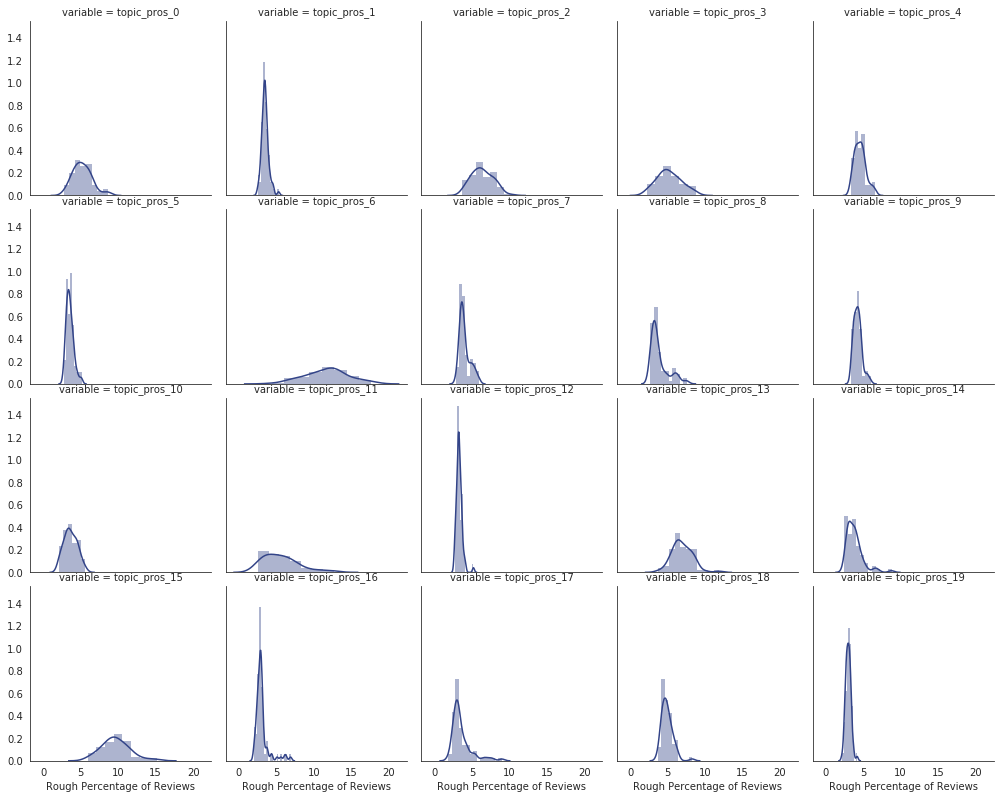

In [180]:
with sns.axes_style("white"):
    g = sns.FacetGrid(pros_melt, col="variable", col_wrap=5, margin_titles=False, height=2.8)
g.map(sns.distplot, "value", color="#334488");
g.set_axis_labels("Rough Percentage of Reviews", "");
g.fig.subplots_adjust(wspace=.08, hspace=.08);

We can see that the distributions of each topic vary quite a bit - not so much in the nature of the distribution itself (most appear normal), but more in the tightness and kurtosis of the distribution. For example, the distribution of topic 6 has a very low kurtosis (aka - it has very fat tails). Meanwhile, topic 1 and 12 are very "squished," indicating a tighter distribution and lower standard error. Some distributions are also skewed to the right (topics 8 and 17).

### Additional Statistical Testing (Pros)
While we have assembled rough percentages of topic categories across different companies, we'd also like to ask the question, "Are these results actually meaningful?" or alternatively, "How robust are these results?"

We want to compare two aspects of these distributions: 
- Do the concentration of topics really differ among companies (i.e. does topic 6 really have a different concentration at AT&T vs. AIG vs. AbbVie?) 
- Do the concentration of topics really differ within a single company (i.e. does topic 6 really have a greater concentration than topic 0 at AT&T?)

Basically, did these distributions occur by chance, or are they actually statistically different from each other?

In [194]:
# 1 sample t-test to test if topic distributions differ among different companies. 
# H0: all companies have the same distribution for that topic.
# from scipy import stats
for i in range(0,20):
    test_result = stats.ttest_1samp(dist_pros[f'topic_pros_{i}'].values, 100/15)
    if test_result[1] > 0.05:
        print(f'topic {i}: ', f't-stat: {test_result[0]}', f'p-value: {test_result[1]}', 'NOT SIGNIFICANT')
    else:
        print(f'topic {i}: ', f't-stat: {test_result[0]}', f'p-value: {test_result[1]}')

topic 0:  t-stat: -9.819700454269215 p-value: 7.315231898059889e-15
topic 1:  t-stat: -57.72610829889248 p-value: 2.0721920153284174e-61
topic 2:  t-stat: -1.7246432665001952 p-value: 0.08894293681424548 NOT SIGNIFICANT
topic 3:  t-stat: -7.706914002569207 p-value: 5.84000315428744e-11
topic 4:  t-stat: -23.1307273966507 p-value: 8.753256899931364e-35
topic 5:  t-stat: -53.4838150821478 p-value: 4.148020959793462e-59
topic 6:  t-stat: 14.990634353095432 p-value: 1.0864097304802613e-23
topic 7:  t-stat: -31.60289834014082 p-value: 1.477477203820459e-43
topic 8:  t-stat: -19.637388468122897 p-value: 2.0683509013634217e-30
topic 9:  t-stat: -37.267099614374814 p-value: 2.355993231696315e-48
topic 10:  t-stat: -29.394337114623657 p-value: 1.7654511227468982e-41
topic 11:  t-stat: -3.7190287890182905 p-value: 0.00039632240867654926
topic 12:  t-stat: -73.88921840592616 p-value: 6.7409384965458e-69
topic 13:  t-stat: 1.8064695863315292 p-value: 0.07508268794057982 NOT SIGNIFICANT
topic 14:  

In [195]:
# chi-2 test to test if topic distributions within a single company are equally distributed ~6.67. 
# H0: all topics have the same distribution within that company.
# from scipy.stats import chisquare
for i in range(0,len(dist_pros.index)):
    test_result = chisquare(dist_pros.iloc[i])
    if test_result[1] > 0.05:
        print(f'{dist_pros.index[i]}: ', f'chi-2 stat: {test_result[0]}', f'p-value: {test_result[1]}', 'NOT SIGNIFICANT')
    else:
        print(f'{dist_pros.index[i]}: ', f'chi-2 stat: {test_result[0]}', f'p-value: {test_result[1]}')

3M:  chi-2 stat: 15.162737262737263 p-value: 0.7121995163745907 NOT SIGNIFICANT
AIG:  chi-2 stat: 21.963863863863864 p-value: 0.2860583947014269 NOT SIGNIFICANT
AT&T:  chi-2 stat: 48.364 p-value: 0.00022722288628765084
AbbVie:  chi-2 stat: 20.033933933933934 p-value: 0.39253883055786165 NOT SIGNIFICANT
Albertsons:  chi-2 stat: 28.0754491017964 p-value: 0.08198731211370189 NOT SIGNIFICANT
Amazon:  chi-2 stat: 19.74215784215784 p-value: 0.41024095655597725 NOT SIGNIFICANT
American Airlines:  chi-2 stat: 27.306212424849694 p-value: 0.09772027463447899 NOT SIGNIFICANT
American Express:  chi-2 stat: 29.58031968031968 p-value: 0.05738837178455353 NOT SIGNIFICANT
AmerisourceBergen:  chi-2 stat: 25.93200000000001 p-value: 0.1320949587086046 NOT SIGNIFICANT
Apple:  chi-2 stat: 34.34755244755245 p-value: 0.016716550615816735
Archer Daniels:  chi-2 stat: 24.143887775551097 p-value: 0.1906907909496856 NOT SIGNIFICANT
Bank of America:  chi-2 stat: 25.064 p-value: 0.15844634646216063 NOT SIGNIFICANT

### Detecting Outlier Companies within each Topic (Pros)

The next step is to determine which companies excel in each our predefined topics. For example, which companies excel in offering training and advancement opportunities to employees?

We can accomplish this by conducting an outlier analysis in which we define outliers as any number that is greater than the Q3(3rd quartile) + 1.5*IQR (interquartile range).

In [132]:
# find outliers by locating values: Q1 - 1.5*IQR < X > Q3 + 1.5*IQR
for i in range(0,20):
    s = dist_pros[f'topic_pros_{i}']
    IQR = iqr(dist_pros[f'topic_pros_{i}'])
    below = s[s<(s.quantile(.25)-IQR)].sort_values(ascending=True)
    above = s[s>(s.quantile(.75)+IQR)].sort_values(ascending=False)
    print(f'topic_pros_{i}: ', above, '\n')

topic_pros_0:  company
New York Life Insurance    8.7
General Electric           8.6
Proctor & Gamble           8.4
Name: topic_pros_0, dtype: float64 

topic_pros_1:  company
Tech Data        5.3
Google           4.6
Intel            4.5
Goldman Sachs    4.5
Walt Disney      4.2
HP               4.2
Name: topic_pros_1, dtype: float64 

topic_pros_2:  company
General Electric    10.2
Name: topic_pros_2, dtype: float64 

topic_pros_3:  company
Humana    8.8
Name: topic_pros_3, dtype: float64 

topic_pros_4:  company
Archer Daniels      6.6
Morgan Stanley      6.5
Goldman Sachs       6.3
General Electric    6.2
Tech Data           6.1
Name: topic_pros_4, dtype: float64 

topic_pros_5:  company
Costco            5.1
Delta Airlines    5.0
Liberty Mutual    4.6
HCA Healthcare    4.6
Name: topic_pros_5, dtype: float64 

topic_pros_6:  company
Costco                 17.7
UPS                    17.6
AT&T                   17.5
Enterprise Products    17.0
Name: topic_pros_6, dtype: float64 

to

## The Moment We've all Been Waiting for - The Excellent Companies:
![Alt Text](https://media.giphy.com/media/GBvkxysAR8Svm/giphy.gif)

- **Availability of training and development programs:**
    - New York Life Insurance, General Electric, Procter & Gamble
- **Cool people & place to work, especially at the start of your career:**
    - Tech Data, Google, Intel, Goldman Sachs, Walt Disney, HP
- **High potential for growth and advancement:**
    - General Electric
- **Good benefits: 401k, health/medical insurance, pto, vacation, bonus:**
    - Humana
- **Great learning opportunity and skills development:**
    - Archer Daniels, Morgan Stanley, Goldman Sachs, General Electric, Tech Data
- **Rewarded for good work (caring managers, bonuses):**
    - Costco, Delta, Liberty Mutual, HCA Healthcare
- **Good pay, reimbursement for expenses, flexible hours:**
    - Costco, UPS, AT&T, Enterprise Products
- **Challenging, fast-paced, striving for excellence:**
    - Facebook, Amazon, UPS, Walmart, New York Life Insurance, PepsiCo, Goldman Sachs, CVS Health
- **Help and customer-oriented:**
    - Kroger, Albertsons, Walmart, Walgreens, Best Buy, Lowe's, Home Depot, Nike, CVS Health, Publix, Walt Disney
- **"No pros":**
    - CVS Health, Kroger, Walgreens, Albertsons, Prudential
- **Superior products/industry:**
    - Microsoft
- **Work-life balance, flexible schedule:**
    - Cisco, Fannie Mae, American Express, HP, Intel
- **Friendly, helpful people and work environment:**
    - Booking.com, HP
- **High quality, exciting projects and smart people:**
    - Goldman Sachs, Google, Microsoft, Facebook, Morgan Stanley
- **Free amenities: free food, discounts, events, gym, education:**
    - Nike, Best Buy, Comcast, Walt Disney, Booking.com, Google, AT&T, Walgreens, Facebook, Kroger
- **People like "family." Best company, best brand. Always new things:**
    - Facebook
- **Better than similar companies, competitors:**
    - Exelon, Liberty Mutual, General Dynamics

### What stands out here?
There are some things that align with our intuition, like Facebook and Amazon being known for a **challenging and fast-paced** environment. Additionally, Microsoft being the lone outlier in offering **superior products**.

What is also interesting is the fact that Humana stands alone by a long shot in offering **great benefits, 401k, health insurance, pto, vacation package, and bonuses**. Similarly, General Electric seems to be known for offering **training and development programs** as well as a **high potential for growth and advancement**. Seems like a great place to work for young employees looking to advance their career.

In the **help and customer-oriented** category, it's interesting but also unsurprising to see that most companies are grocery chains and brick and mortar stores such as Kroger, Albertsons, Walmart, Walgreens, Best Buy, Lowe's, Home Depot, and Publix.

### Topic Distributions by Company (Cons)

In [149]:
all_reviews['doc_topic_cons'] = list(ldamodel_cons_20.get_document_topics(cons_corpus))
all_reviews['doc_topic_cons'] = all_reviews['doc_topic_cons'].map(lambda x: dict(x))
for topic_num in range(20):
    all_reviews[f'topic_cons_{topic_num}'] = all_reviews['doc_topic_cons'].apply(lambda x: x.get(topic_num, 0))

dist_cons = round(all_reviews.groupby('company').mean().iloc[:,-20:],3)*100
# preview
dist_cons.head()

,topic_cons_0,topic_cons_1,topic_cons_2,topic_cons_3,topic_cons_4,topic_cons_5,topic_cons_6,topic_cons_7,topic_cons_8,topic_cons_9,topic_cons_10,topic_cons_11,topic_cons_12,topic_cons_13,topic_cons_14,topic_cons_15,topic_cons_16,topic_cons_17,topic_cons_18,topic_cons_19
company,,,,,,,,,,,,,,,,,,,,
3M,8.9,3.2,2.7,4.6,2.9,3.2,3.2,4.6,7.8,8.5,4.7,5.3,5.1,3.8,4.9,4.2,6.9,5.8,2.8,6.7
AIG,8.2,2.9,3.1,3.9,3.0,3.3,3.1,4.6,8.9,5.5,4.4,4.4,5.9,7.7,4.6,3.2,8.3,7.4,3.2,4.5
AT&T,10.0,6.2,3.5,5.0,5.6,3.2,2.8,4.6,7.4,4.1,5.8,4.4,3.4,6.6,5.7,3.1,4.0,4.0,4.8,5.7
AbbVie,7.4,3.9,3.1,4.8,2.5,3.7,3.4,5.1,7.2,8.7,6.7,5.0,5.2,3.8,4.2,4.5,7.2,4.6,3.5,5.5
Albertsons,12.8,10.1,4.1,5.5,2.9,2.9,2.2,5.8,6.4,2.7,3.3,3.8,3.7,3.2,6.9,2.6,3.7,6.8,4.2,6.5


### Visualizing the Distribution of Topic Concentrations (Cons)

In [182]:
cons_melt = pd.melt(dist_cons)
cons_melt['company'] = list(dist_cons.index)*20

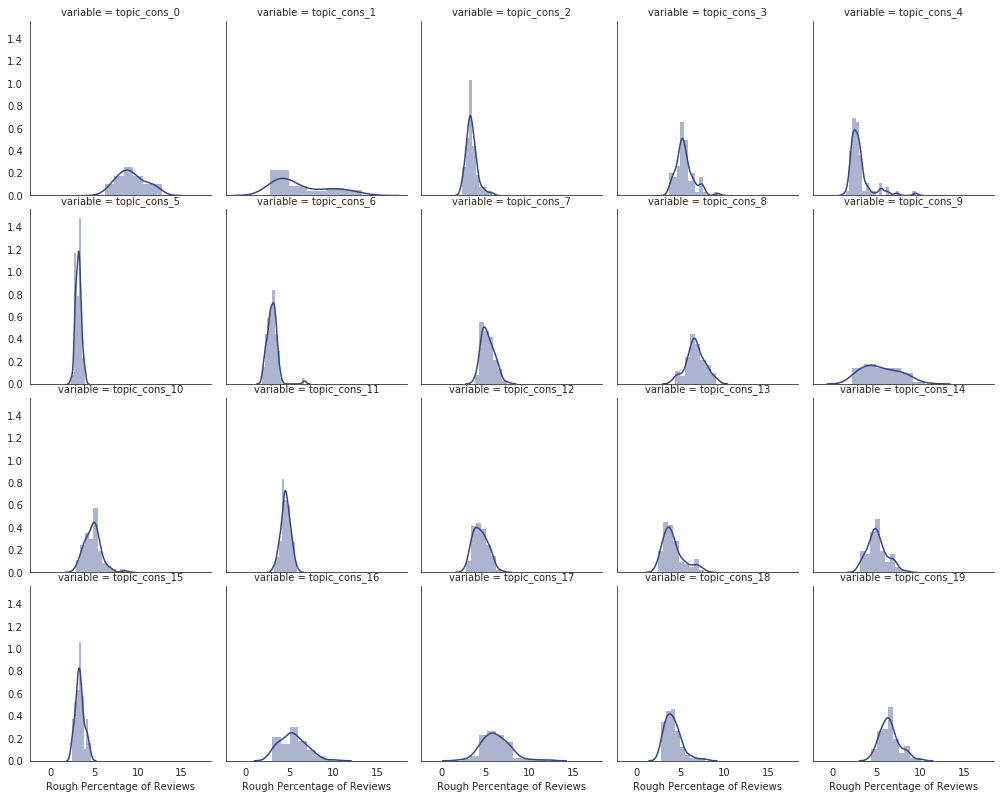

In [183]:
with sns.axes_style("white"):
    g = sns.FacetGrid(cons_melt, col="variable", col_wrap=5, margin_titles=False, height=2.8)
g.map(sns.distplot, "value", color="#334488");
g.set_axis_labels("Rough Percentage of Reviews", "");
g.fig.subplots_adjust(wspace=.08, hspace=.08);

### Additional Statistical Testing (Cons)

In [201]:
# 1 sample t-test to test if topic distributions differ among different companies. 
# H0: all companies have the same distribution for that topic.
# from scipy import stats
for i in range(0,20):
    test_result = stats.ttest_1samp(dist_cons[f'topic_cons_{i}'].values, 100/15)
    if test_result[1] > 0.05:
        print(f'topic {i}: ', f't-stat: {test_result[0]}', f'p-value: {test_result[1]}', 'NOT SIGNIFICANT')
    else:
        print(f'topic {i}: ', f't-stat: {test_result[0]}', f'p-value: {test_result[1]}')

topic 0:  t-stat: 13.621821987239823 p-value: 1.724685902528709e-21
topic 1:  t-stat: -0.9947108873981519 p-value: 0.32325494066774474 NOT SIGNIFICANT
topic 2:  t-stat: -43.389273082589256 p-value: 7.540032854214066e-53
topic 3:  t-stat: -10.166903151263467 p-value: 1.7065187098475546e-15
topic 4:  t-stat: -22.517977694473455 p-value: 4.69959328605072e-34
topic 5:  t-stat: -92.80782679099217 p-value: 7.432135385595226e-76
topic 6:  t-stat: -48.10408603592228 p-value: 6.309219790452031e-56
topic 7:  t-stat: -15.711396610549347 p-value: 8.295872519091573e-25
topic 8:  t-stat: 0.04403035792463026 p-value: 0.9650038040476254 NOT SIGNIFICANT
topic 9:  t-stat: -4.841911281180754 p-value: 7.274963193461135e-06
topic 10:  t-stat: -16.352110549853464 p-value: 8.904956747269916e-26
topic 11:  t-stat: -33.349544149809624 p-value: 4.1119719398376e-45
topic 12:  t-stat: -22.16069520667929 p-value: 1.2724339496634066e-33
topic 13:  t-stat: -17.39477138021719 p-value: 2.6260376419093747e-27
topic 14:

In [200]:
# chi-2 test to test if topic distributions within a single company are equally distributed ~6.67. 
# H0: all topics have the same distribution within that company.
# from scipy.stats import chisquare
for i in range(0,len(dist_cons.index)):
    test_result = chisquare(dist_cons.iloc[i])
    if test_result[1] > 0.05:
        print(f'{dist_cons.index[i]}: ', f'chi-2 stat: {test_result[0]}', f'p-value: {test_result[1]}', 'NOT SIGNIFICANT')
    else:
        print(f'{dist_cons.index[i]}: ', f'chi-2 stat: {test_result[0]}', f'p-value: {test_result[1]}')

3M:  chi-2 stat: 13.887374749499001 p-value: 0.7902167128060458 NOT SIGNIFICANT
AIG:  chi-2 stat: 15.574325674325678 p-value: 0.6854630228199443 NOT SIGNIFICANT
AT&T:  chi-2 stat: 11.333233233233232 p-value: 0.9121196195762886 NOT SIGNIFICANT
AbbVie:  chi-2 stat: 10.483999999999998 p-value: 0.9399795669993731 NOT SIGNIFICANT
Albertsons:  chi-2 stat: 27.754145854145857 p-value: 0.08827570995241588 NOT SIGNIFICANT
Amazon:  chi-2 stat: 20.319999999999997 p-value: 0.37555839054834755 NOT SIGNIFICANT
American Airlines:  chi-2 stat: 17.232667332667333 p-value: 0.574108565256136 NOT SIGNIFICANT
American Express:  chi-2 stat: 8.071457085828342 p-value: 0.98593731090039 NOT SIGNIFICANT
AmerisourceBergen:  chi-2 stat: 18.12 p-value: 0.5144362769106092 NOT SIGNIFICANT
Apple:  chi-2 stat: 16.386286286286293 p-value: 0.631369398341251 NOT SIGNIFICANT
Archer Daniels:  chi-2 stat: 10.91281281281281 p-value: 0.9267363309345729 NOT SIGNIFICANT
Bank of America:  chi-2 stat: 8.901402805611223 p-value: 0.

### Detecting Outlier Companies within each Topic (Cons)

Repeating the above steps, but for the Cons section of all reviews

In [137]:
for i in range(0,20):
    s = dist_cons[f'topic_cons_{i}']
    IQR = iqr(dist_cons[f'topic_cons_{i}'])
    below = s[s<(s.quantile(.25)-IQR)].sort_values(ascending=True)
    above = s[s>(s.quantile(.75)+IQR)].sort_values(ascending=False)
    print(f'topic_{i}: ', above, '\n')

topic_0:  Series([], Name: topic_cons_0, dtype: float64) 

topic_1:  Series([], Name: topic_cons_1, dtype: float64) 

topic_2:  company
Apple       5.8
Nike        5.3
Facebook    4.8
Best Buy    4.8
Name: topic_cons_2, dtype: float64 

topic_3:  company
Google            9.2
John Deere        7.6
Delta Airlines    7.5
Nike              7.4
HP                7.4
Facebook          7.3
Costco            7.2
Apple             6.9
Name: topic_cons_3, dtype: float64 

topic_4:  company
Wells Fargo                9.5
New York Life Insurance    7.3
Best Buy                   6.4
Comcast                    6.1
AT&T                       5.6
Verizon Wireless           5.5
Bank of America            5.5
Sysco                      4.8
Progressive                4.2
Name: topic_cons_4, dtype: float64 

topic_5:  company
Microsoft      4.0
Phillips 66    3.9
Facebook       3.9
Name: topic_cons_5, dtype: float64 

topic_6:  company
Exelon              6.7
American Express    4.0
Name: topic_cons_6, 

## Now, for the Not-so-hot Companies:
![Alt Text](https://78.media.tumblr.com/6126546b01dc449a24a5b416c0af8095/tumblr_ojibj1DBcm1vjgjw1o7_400.gif)

- **Long work hours, weekend shifts:**
    - None
- **"No cons":**
    - Google, John Deere, Delta, Nike, HP, Facebook, Costco, Apple
- **Unrealistic sales goals. Lofty expectations:**
    - Wells Fargo, New York Life Insurance, Best Buy, Comcast, AT&T, Verizon Wireless, Bank of America, Sysco, Progressive
- **Incompetent managers, focused on metrics:**
    - Microsoft, Phillips 66, Facebook
- **Office politics, red tape, a lot of "manager influence":**
    - Exelon, American Express
- **Not treated well or respected:**
    - Enterprise Products
- **Lack of leadership, poor management, limited communication:**
    - Fannie Mae, Centene, AIG
- **Bureaucratic, big company, hierarchy, protocols. "small fish in a big pond.":**
    - Procter & Gamble
- **Limited work life balance, opportunities for advancement/growth:**
    - Goldman Sachs, Apple, AbbVie, PepsiCo
- **Too many processes, procedures, meetings. Too formalized:**
    - Exxon Mobil
- **Lack of development path, training, support:**
    - Centene
- **Frequent change and layoffs:**
    - AIG, Pfizer, Merck, Caterpillar, Cisco, AT&T, Humana, Liberty Mutual
- **Lack of care for employees from upper management:**
    - General Dynamics, HCA Healthcare, Cigna, Humana
- **Difficult scheduling, including working outside:**
    - Microsoft, AbbVie, Google, Ford
- **Low salary, limited benefits, lack of promotion:**
    - Tech Data, HP, Kroger
- **High stress, micromanagement, turnover:**
    - CVS Health, Progressive, Apple
- **Hard to advance from a lower level position, especially from part time to full time:**
    - Publix, Delta, Costco, UPS, Apple, Nike, Google

### What stands out here?
Nothing here seems immediately obvious. Some interesting findings include Procter & Gamble being a **bureaucratic, hierarchical, big company** and Centene having a **lack of a development path, training, and support.** 

A interesting and telling category is the **lack of leadership, poor management, and limited communication.** This seems like a category that would play an influential role in determining company-fit for job seekers. The companies falling in that category are: Fannie Mae, Centene, and AIG. 

Lastly, it's interesting that CVS Health, Progressive, and Apple are outliers in the category of **high stress, micromanagement, turnover.** Upon closer inspection, it seems that "customers" are a frequent mention in reviews that are rated high in this category, mostly in the form of "working with customers" or "dealing with customers." So it's likely that this category captures a lot of customer-service employees.

## LDA Topic Modeling Conclusions
- It's important to remember that while the generated topics are pretty informative and well segmented, they are still not _perfect_. 
- There are still some categories that overlap with each other and some categories that contain multiple topics (i.e. benefits, work life balance, people & culture).
- When calculating outlier companies, it's also important to realize that this is a relative measure and not an absolute measure. We are only comparing the Fortune 100 companies to each other, and not objectively as a whole. 
- For example, it's possible that all companies objectively offer great benefits, but we are only looking at companies where that was mentioned significantly more in the reviews compared to others.
- As a continuation of the last point, these outliers are entirely based on the frequency of topic mentions in reviews. In other words, the average distribution of topics for a given company are all interdependent and correlated with each other. 
- For example, if the _only_ benefit employees liked about a company was its training programs, it would undoubtedly be an outlier in that category. That does not objectively mean that its training programs are the best - it just means that employees mentioned it more frequently than other topics.